* **Ad:** Alper
* **Soyad:** Serin
* **Okul Numarası:** 2312729001
* **Github Linki:** https://github.com/alpsei/genetik_algoritma_gunes_paneli


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def kullanici_parametreleri():
    try:
        pop_sayisi = int(input("Popülasyon sayısını giriniz (Örn: 50): "))
        gen_sayisi = int(input("Jenerasyon sayısını giriniz (Örn: 100): "))
        mut_orani = float(input("Mutasyon oranını giriniz (0-1 arası, Örn: 0.1): "))
        ceza_katsayi = 10000
    except:
        print("Hatalı giriş! Varsayılan değerler kullanılacak.")
        pop_sayisi = 50
        gen_sayisi = 100
        mut_orani = 0.1


    return pop_sayisi, gen_sayisi, mut_orani, ceza_katsayi

In [ ]:
def birey_uret():
    gen1 = random.uniform(10, 45)   # Eğim açısı
    gen2 = random.uniform(0, 90)    # Yön sapması
    return [gen1, gen2]


In [ ]:
def populasyon_uret(kisi_sayisi):
    gen1_sutunu = np.random.uniform(10, 45, (kisi_sayisi, 1))
    gen2_sutunu = np.random.uniform(0, 90, (kisi_sayisi, 1))
    return np.hstack((gen1_sutunu, gen2_sutunu))

In [ ]:
def kisit_kontrol(birey):
    ceza = 0
    x1, x2 = birey

    if (x1 + 0.5 * x2) > 60:
        ceza += 1
    if x2 < 15:
        ceza += 1

    return ceza

In [ ]:
def fitness_fonksiyonu(populasyon_matrisi, ceza_katsayi):
    x1 = populasyon_matrisi[:, 0]
    x2 = populasyon_matrisi[:, 1]

    # Amaç fonksiyonu
    y = (6 * x1) + (4 * x2) - (0.1 * (x1 ** 2))

    ihlal_sayisi = np.zeros(len(populasyon_matrisi))
    ihlal_sayisi += np.where((x1 + (0.5 * x2)) > 60, 1, 0)
    ihlal_sayisi += np.where(x2 < 15, 1, 0)

    return y - (ihlal_sayisi * ceza_katsayi)

In [ ]:
def rulet_secim(populasyon, uygunluklar):
    uygunluklar = np.array(uygunluklar)

    # Negatif değer varsa pozitif kaydır
    min_deger = np.min(uygunluklar)
    if min_deger < 0:
        uygunluklar = uygunluklar - min_deger + 1

    toplam = np.sum(uygunluklar)

    # Hepsi 0 ise rastgele seç
    if toplam == 0:
        idx = random.randint(0, len(populasyon) - 1)
        return populasyon[idx].copy()

    olasiliklar = uygunluklar / toplam
    idx = np.random.choice(len(populasyon), p=olasiliklar)
    return populasyon[idx].copy()

In [ ]:
def caprazlama(anne, baba):
    cocuk = np.zeros(2)
    if random.random() > 0.5:
        cocuk[0] = anne[0]
        cocuk[1] = baba[1]
    else:
        cocuk[0] = baba[0]
        cocuk[1] = anne[1]
    return cocuk

In [ ]:
def mutasyon(birey, mutasyon_orani):
    if random.random() < mutasyon_orani:
        birey[0] += random.uniform(-2, 2)
        birey[0] = np.clip(birey[0], 10, 45)

    if random.random() < mutasyon_orani:
        birey[1] += random.uniform(-5, 5)
        birey[1] = np.clip(birey[1], 0, 90)

    return birey

In [ ]:
POPULASYON_SAYISI, JENERASYON_SAYISI, MUTASYON_ORANI, CEZA_KATSAYI = kullanici_parametreleri()

populasyon = populasyon_uret(POPULASYON_SAYISI)

en_iyi_fitness = []
en_iyi_x1 = []
en_iyi_x2 = []

for gen in range(JENERASYON_SAYISI):
    puanlar = fitness_fonksiyonu(populasyon, CEZA_KATSAYI)

    en_iyi_idx = np.argmax(puanlar)
    en_iyi_birey = populasyon[en_iyi_idx]

    en_iyi_fitness.append(puanlar[en_iyi_idx])
    en_iyi_x1.append(en_iyi_birey[0])
    en_iyi_x2.append(en_iyi_birey[1])
    print(f"{gen}. Nesil | Fitness: {puanlar[en_iyi_idx]:.2f}")

    yeni_nesil = []

    # Elitizm
    sirali = np.argsort(puanlar)[::-1]
    yeni_nesil.append(populasyon[sirali[0]].copy())
    yeni_nesil.append(populasyon[sirali[1]].copy())

    while len(yeni_nesil) < POPULASYON_SAYISI:
        ebeveyn1 = rulet_secim(populasyon, puanlar)
        ebeveyn2 = rulet_secim(populasyon, puanlar)
        cocuk = caprazlama(ebeveyn1, ebeveyn2)
        cocuk = mutasyon(cocuk, MUTASYON_ORANI)
        yeni_nesil.append(cocuk)

    populasyon = np.array(yeni_nesil)

Popülasyon sayısını giriniz (Örn: 50): 50
Jenerasyon sayısını giriniz (Örn: 100): 100
Mutasyon oranını giriniz (0-1 arası, Örn: 0.1): 0.1
0. Nesil | Fitness: 396.95
1. Nesil | Fitness: 396.95
2. Nesil | Fitness: 396.95
3. Nesil | Fitness: 396.95
4. Nesil | Fitness: 396.95
5. Nesil | Fitness: 396.95
6. Nesil | Fitness: 400.65
7. Nesil | Fitness: 400.65
8. Nesil | Fitness: 400.65
9. Nesil | Fitness: 400.65
10. Nesil | Fitness: 402.24
11. Nesil | Fitness: 402.24
12. Nesil | Fitness: 402.24
13. Nesil | Fitness: 402.24
14. Nesil | Fitness: 402.89
15. Nesil | Fitness: 402.89
16. Nesil | Fitness: 402.89
17. Nesil | Fitness: 402.89
18. Nesil | Fitness: 404.37
19. Nesil | Fitness: 404.37
20. Nesil | Fitness: 404.37
21. Nesil | Fitness: 404.37
22. Nesil | Fitness: 404.37
23. Nesil | Fitness: 404.37
24. Nesil | Fitness: 404.37
25. Nesil | Fitness: 411.02
26. Nesil | Fitness: 411.02
27. Nesil | Fitness: 411.02
28. Nesil | Fitness: 412.36
29. Nesil | Fitness: 412.36
30. Nesil | Fitness: 412.36
31. 

In [ ]:
puanlar = fitness_fonksiyonu(populasyon, CEZA_KATSAYI)
idx = np.argmax(puanlar)
kazanan = populasyon[idx]

print("\nEN İYİ ÇÖZÜM")
print(f"Fitness: {puanlar[idx]:.2f}")
print(f"Eğim Açısı (x1): {kazanan[0]:.2f}")
print(f"Yön Sapması (x2): {kazanan[1]:.2f}")


EN İYİ ÇÖZÜM
Fitness: 427.39
Eğim Açısı (x1): 14.96
Yön Sapması (x2): 90.00


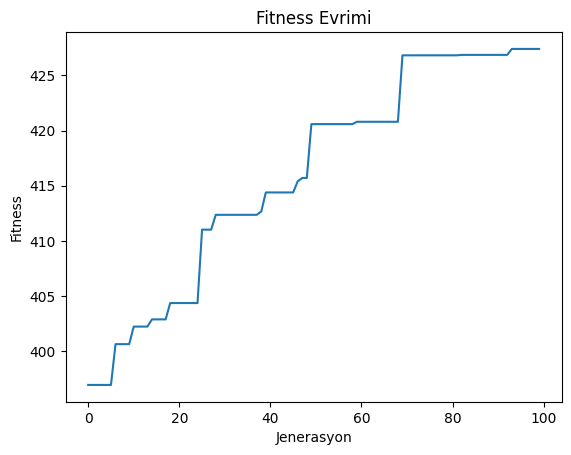

In [ ]:
plt.figure()
plt.plot(en_iyi_fitness)
plt.title("Fitness Evrimi")
plt.xlabel("Jenerasyon")
plt.ylabel("Fitness")
plt.show()
